# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

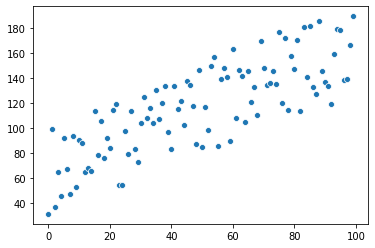

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1136.647490
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 1116.573248
[1.92957289 2.43459456]
Iteration 2 | Cost: 1097.654346
[1.92643996 1.56048292]
Iteration 3 | Cost: 1079.823732
[1.94927003 2.40855167]
Iteration 4 | Cost: 1063.018250
[1.94689876 1.58516212]
Iteration 5 | Cost: 1047.178407
[1.96898358 2.38400275]
Iteration 6 | Cost: 1032.248163
[1.96732958 1.60839154]
Iteration 7 | Cost: 1018.174730
[1.98871222 2.3608611 ]
Iteration 8 | Cost: 1004.908385
[1.98773369 1.63025531]
Iteration 9 | Cost: 992.402290
[2.00845474 2.33904505]
Iteration 10 | Cost: 980.612324
[2.00811231 1.65083271]
Iteration 11 | Cost: 969.496930
[2.02820998 2.31847767]
Iteration 12 | Cost: 959.016959
[2.02846654 1.67019839]
Iteration 13 | Cost: 949.135537
[2.04797684 2.2990865 ]
Iteration 14 | Cost: 939.817928
[2.04879746 1.68842269]
Iteration 15 | Cost: 931.031414
[2.0677543  2.28080328]
Iteration 16 | Cost: 922.745174
[2.06910606 1.70557185]
Iteration 17 | Cost: 914.930177
[2.08754139 2.263

[6.56279414 1.92112922]
Iteration 481 | Cost: 718.391973
[6.5721312  1.92098898]
Iteration 482 | Cost: 718.246694
[6.58146682 1.92084771]
Iteration 483 | Cost: 718.101460
[6.59080103 1.92070748]
Iteration 484 | Cost: 717.956270
[6.60013381 1.9205663 ]
Iteration 485 | Cost: 717.811124
[6.60946519 1.92042608]
Iteration 486 | Cost: 717.666022
[6.61879513 1.92028496]
Iteration 487 | Cost: 717.520964
[6.62812366 1.92014476]
Iteration 488 | Cost: 717.375951
[6.63745076 1.92000371]
Iteration 489 | Cost: 717.230982
[6.64677645 1.91986353]
Iteration 490 | Cost: 717.086056
[6.65610071 1.91972255]
Iteration 491 | Cost: 716.941175
[6.66542357 1.91958238]
Iteration 492 | Cost: 716.796339
[6.67474499 1.91944147]
Iteration 493 | Cost: 716.651546
[6.684065   1.91930132]
Iteration 494 | Cost: 716.506797
[6.69338359 1.91916047]
Iteration 495 | Cost: 716.362092
[6.70270076 1.91902035]
Iteration 496 | Cost: 716.217432
[6.71201651 1.91887956]
Iteration 497 | Cost: 716.072815
[6.72133085 1.91873946]
Iterati

[9.70118289 1.87381344]
Iteration 826 | Cost: 670.806283
[9.7100422  1.87367987]
Iteration 827 | Cost: 670.675491
[9.71890015 1.87354632]
Iteration 828 | Cost: 670.544739
[9.72775676 1.87341279]
Iteration 829 | Cost: 670.414026
[9.73661202 1.87327929]
Iteration 830 | Cost: 670.283354
[9.74546593 1.8731458 ]
Iteration 831 | Cost: 670.152721
[9.75431849 1.87301234]
Iteration 832 | Cost: 670.022128
[9.76316971 1.87287889]
Iteration 833 | Cost: 669.891575
[9.77201958 1.87274546]
Iteration 834 | Cost: 669.761061
[9.7808681  1.87261206]
Iteration 835 | Cost: 669.630587
[9.78971527 1.87247867]
Iteration 836 | Cost: 669.500153
[9.7985611  1.87234531]
Iteration 837 | Cost: 669.369758
[9.80740558 1.87221197]
Iteration 838 | Cost: 669.239404
[9.81624871 1.87207864]
Iteration 839 | Cost: 669.109089
[9.8250905  1.87194534]
Iteration 840 | Cost: 668.978813
[9.83393094 1.87181206]
Iteration 841 | Cost: 668.848578
[9.84277004 1.87167879]
Iteration 842 | Cost: 668.718381
[9.85160779 1.87154555]
Iterati

Iteration 1188 | Cost: 625.968740
[12.83010289  1.82664014]
Iteration 1189 | Cost: 625.851598
[12.83848589  1.82651376]
Iteration 1190 | Cost: 625.734491
[12.84686762  1.82638739]
Iteration 1191 | Cost: 625.617420
[12.85524806  1.82626104]
Iteration 1192 | Cost: 625.500385
[12.86362723  1.82613471]
Iteration 1193 | Cost: 625.383385
[12.87200513  1.8260084 ]
Iteration 1194 | Cost: 625.266422
[12.88038175  1.82588211]
Iteration 1195 | Cost: 625.149493
[12.8887571   1.82575584]
Iteration 1196 | Cost: 625.032600
[12.89713117  1.82562959]
Iteration 1197 | Cost: 624.915743
[12.90550396  1.82550336]
Iteration 1198 | Cost: 624.798922
[12.91387548  1.82537714]
Iteration 1199 | Cost: 624.682136
[12.92224573  1.82525095]
Iteration 1200 | Cost: 624.565385
[12.9306147   1.82512477]
Iteration 1201 | Cost: 624.448670
[12.9389824   1.82499862]
Iteration 1202 | Cost: 624.331991
[12.94734882  1.82487248]
Iteration 1203 | Cost: 624.215347
[12.95571398  1.82474636]
Iteration 1204 | Cost: 624.098739
[12.96

[16.83526863  1.76625609]
Iteration 1685 | Cost: 571.931862
[16.84304193  1.7661389 ]
Iteration 1686 | Cost: 571.831170
[16.85081406  1.76602172]
Iteration 1687 | Cost: 571.730509
[16.858585    1.76590456]
Iteration 1688 | Cost: 571.629878
[16.86635475  1.76578742]
Iteration 1689 | Cost: 571.529279
[16.87412333  1.7656703 ]
Iteration 1690 | Cost: 571.428710
[16.88189072  1.76555319]
Iteration 1691 | Cost: 571.328171
[16.88965693  1.76543611]
Iteration 1692 | Cost: 571.227663
[16.89742195  1.76531904]
Iteration 1693 | Cost: 571.127186
[16.9051858   1.76520199]
Iteration 1694 | Cost: 571.026739
[16.91294846  1.76508495]
Iteration 1695 | Cost: 570.926323
[16.92070994  1.76496794]
Iteration 1696 | Cost: 570.825937
[16.92847024  1.76485094]
Iteration 1697 | Cost: 570.725582
[16.93622936  1.76473396]
Iteration 1698 | Cost: 570.625258
[16.94398729  1.76461699]
Iteration 1699 | Cost: 570.524964
[16.95174405  1.76450005]
Iteration 1700 | Cost: 570.424700
[16.95949963  1.76438312]
Iteration 1701

Iteration 2123 | Cost: 530.636929
[20.13646712  1.71648544]
Iteration 2124 | Cost: 530.548808
[20.1437379   1.71637582]
Iteration 2125 | Cost: 530.460715
[20.15100757  1.71626622]
Iteration 2126 | Cost: 530.372648
[20.15827613  1.71615663]
Iteration 2127 | Cost: 530.284608
[20.16554358  1.71604707]
Iteration 2128 | Cost: 530.196595
[20.17280993  1.71593751]
Iteration 2129 | Cost: 530.108609
[20.18007518  1.71582798]
Iteration 2130 | Cost: 530.020650
[20.18733931  1.71571846]
Iteration 2131 | Cost: 529.932717
[20.19460234  1.71560896]
Iteration 2132 | Cost: 529.844811
[20.20186427  1.71549947]
Iteration 2133 | Cost: 529.756932
[20.20912509  1.71539001]
Iteration 2134 | Cost: 529.669080
[20.2163848   1.71528056]
Iteration 2135 | Cost: 529.581254
[20.22364341  1.71517112]
Iteration 2136 | Cost: 529.493455
[20.23090092  1.7150617 ]
Iteration 2137 | Cost: 529.405683
[20.23815732  1.7149523 ]
Iteration 2138 | Cost: 529.317938
[20.24541261  1.71484292]
Iteration 2139 | Cost: 529.230219
[20.25

Iteration 2467 | Cost: 501.852679
[22.57343527  1.67974439]
Iteration 2468 | Cost: 501.773322
[22.58033508  1.67964036]
Iteration 2469 | Cost: 501.693989
[22.58723383  1.67953635]
Iteration 2470 | Cost: 501.614680
[22.59413153  1.67943236]
Iteration 2471 | Cost: 501.535395
[22.60102819  1.67932838]
Iteration 2472 | Cost: 501.456134
[22.60792379  1.67922442]
Iteration 2473 | Cost: 501.376897
[22.61481834  1.67912047]
Iteration 2474 | Cost: 501.297684
[22.62171185  1.67901654]
Iteration 2475 | Cost: 501.218496
[22.6286043   1.67891263]
Iteration 2476 | Cost: 501.139331
[22.63549571  1.67880873]
Iteration 2477 | Cost: 501.060191
[22.64238607  1.67870485]
Iteration 2478 | Cost: 500.981075
[22.64927537  1.67860098]
Iteration 2479 | Cost: 500.901983
[22.65616363  1.67849713]
Iteration 2480 | Cost: 500.822915
[22.66305084  1.67839329]
Iteration 2481 | Cost: 500.743871
[22.669937    1.67828947]
Iteration 2482 | Cost: 500.664851
[22.67682212  1.67818567]
Iteration 2483 | Cost: 500.585855
[22.68

Iteration 2940 | Cost: 466.888980
[25.72254839  1.63226665]
Iteration 2941 | Cost: 466.820266
[25.72896882  1.63216985]
Iteration 2942 | Cost: 466.751574
[25.73538826  1.63207307]
Iteration 2943 | Cost: 466.682902
[25.74180673  1.6319763 ]
Iteration 2944 | Cost: 466.614251
[25.74822423  1.63187955]
Iteration 2945 | Cost: 466.545622
[25.75464074  1.63178281]
Iteration 2946 | Cost: 466.477013
[25.76105628  1.63168608]
Iteration 2947 | Cost: 466.408425
[25.76747084  1.63158937]
Iteration 2948 | Cost: 466.339857
[25.77388443  1.63149268]
Iteration 2949 | Cost: 466.271311
[25.78029704  1.631396  ]
Iteration 2950 | Cost: 466.202786
[25.78670867  1.63129933]
Iteration 2951 | Cost: 466.134281
[25.79311933  1.63120268]
Iteration 2952 | Cost: 466.065797
[25.79952901  1.63110605]
Iteration 2953 | Cost: 465.997334
[25.80593772  1.63100943]
Iteration 2954 | Cost: 465.928892
[25.81234545  1.63091282]
Iteration 2955 | Cost: 465.860471
[25.81875221  1.63081623]
Iteration 2956 | Cost: 465.792071
[25.82

Iteration 3281 | Cost: 444.629665
[27.85621777  1.60009829]
Iteration 3282 | Cost: 444.567728
[27.8623134   1.60000639]
Iteration 3283 | Cost: 444.505810
[27.86840809  1.59991451]
Iteration 3284 | Cost: 444.443911
[27.87450186  1.59982263]
Iteration 3285 | Cost: 444.382030
[27.8805947   1.59973077]
Iteration 3286 | Cost: 444.320168
[27.88668661  1.59963893]
Iteration 3287 | Cost: 444.258326
[27.8927776  1.5995471]
Iteration 3288 | Cost: 444.196502
[27.89886765  1.59945528]
Iteration 3289 | Cost: 444.134696
[27.90495678  1.59936348]
Iteration 3290 | Cost: 444.072910
[27.91104499  1.59927169]
Iteration 3291 | Cost: 444.011142
[27.91713226  1.59917991]
Iteration 3292 | Cost: 443.949394
[27.92321861  1.59908815]
Iteration 3293 | Cost: 443.887664
[27.92930404  1.59899641]
Iteration 3294 | Cost: 443.825952
[27.93538854  1.59890467]
Iteration 3295 | Cost: 443.764260
[27.94147211  1.59881295]
Iteration 3296 | Cost: 443.702586
[27.94755475  1.59872125]
Iteration 3297 | Cost: 443.640932
[27.9536

[29.61477913  1.57358527]
Iteration 3577 | Cost: 427.095504
[29.62060705  1.57349741]
Iteration 3578 | Cost: 427.038905
[29.62643409  1.57340955]
Iteration 3579 | Cost: 426.982323
[29.63226023  1.57332172]
Iteration 3580 | Cost: 426.925759
[29.6380855   1.57323389]
Iteration 3581 | Cost: 426.869211
[29.64390987  1.57314608]
Iteration 3582 | Cost: 426.812681
[29.64973336  1.57305828]
Iteration 3583 | Cost: 426.756168
[29.65555596  1.5729705 ]
Iteration 3584 | Cost: 426.699672
[29.66137768  1.57288273]
Iteration 3585 | Cost: 426.643193
[29.66719851  1.57279497]
Iteration 3586 | Cost: 426.586732
[29.67301845  1.57270722]
Iteration 3587 | Cost: 426.530288
[29.67883751  1.57261949]
Iteration 3588 | Cost: 426.473861
[29.68465568  1.57253177]
Iteration 3589 | Cost: 426.417451
[29.69047297  1.57244407]
Iteration 3590 | Cost: 426.361058
[29.69628937  1.57235638]
Iteration 3591 | Cost: 426.304683
[29.70210488  1.5722687 ]
Iteration 3592 | Cost: 426.248324
[29.70791951  1.57218104]
Iteration 3593

Iteration 4007 | Cost: 404.280293
[32.04616555  1.53692837]
Iteration 4008 | Cost: 404.230639
[32.05162335  1.53684609]
Iteration 4009 | Cost: 404.181001
[32.05708032  1.53676381]
Iteration 4010 | Cost: 404.131378
[32.06253646  1.53668155]
Iteration 4011 | Cost: 404.081770
[32.06799177  1.53659931]
Iteration 4012 | Cost: 404.032176
[32.07344624  1.53651707]
Iteration 4013 | Cost: 403.982598
[32.07889989  1.53643485]
Iteration 4014 | Cost: 403.933036
[32.08435271  1.53635264]
Iteration 4015 | Cost: 403.883488
[32.0898047   1.53627044]
Iteration 4016 | Cost: 403.833955
[32.09525586  1.53618826]
Iteration 4017 | Cost: 403.784438
[32.10070618  1.53610609]
Iteration 4018 | Cost: 403.734935
[32.10615568  1.53602393]
Iteration 4019 | Cost: 403.685448
[32.11160435  1.53594178]
Iteration 4020 | Cost: 403.635975
[32.11705219  1.53585965]
Iteration 4021 | Cost: 403.586518
[32.1224992   1.53577752]
Iteration 4022 | Cost: 403.537075
[32.12794538  1.53569541]
Iteration 4023 | Cost: 403.487648
[32.13

[33.7405338   1.51138316]
Iteration 4326 | Cost: 389.183447
[33.74573367  1.51130476]
Iteration 4327 | Cost: 389.138390
[33.75093275  1.51122638]
Iteration 4328 | Cost: 389.093346
[33.75613104  1.511148  ]
Iteration 4329 | Cost: 389.048316
[33.76132854  1.51106964]
Iteration 4330 | Cost: 389.003299
[33.76652525  1.5109913 ]
Iteration 4331 | Cost: 388.958297
[33.77172117  1.51091296]
Iteration 4332 | Cost: 388.913308
[33.77691629  1.51083464]
Iteration 4333 | Cost: 388.868332
[33.78211063  1.51075632]
Iteration 4334 | Cost: 388.823371
[33.78730417  1.51067802]
Iteration 4335 | Cost: 388.778423
[33.79249692  1.51059973]
Iteration 4336 | Cost: 388.733488
[33.79768889  1.51052146]
Iteration 4337 | Cost: 388.688568
[33.80288006  1.51044319]
Iteration 4338 | Cost: 388.643661
[33.80807044  1.51036494]
Iteration 4339 | Cost: 388.598768
[33.81326003  1.5102867 ]
Iteration 4340 | Cost: 388.553888
[33.81844884  1.51020847]
Iteration 4341 | Cost: 388.509022
[33.82363685  1.51013025]
Iteration 4342

[36.7556407   1.46592577]
Iteration 4933 | Cost: 364.208315
[36.76038159  1.4658543 ]
Iteration 4934 | Cost: 364.170860
[36.76512176  1.46578283]
Iteration 4935 | Cost: 364.133418
[36.76986121  1.46571138]
Iteration 4936 | Cost: 364.095986
[36.77459994  1.46563993]
Iteration 4937 | Cost: 364.058566
[36.77933795  1.4655685 ]
Iteration 4938 | Cost: 364.021157
[36.78407524  1.46549708]
Iteration 4939 | Cost: 363.983760
[36.7888118   1.46542567]
Iteration 4940 | Cost: 363.946374
[36.79354764  1.46535427]
Iteration 4941 | Cost: 363.908999
[36.79828277  1.46528288]
Iteration 4942 | Cost: 363.871636
[36.80301717  1.4652115 ]
Iteration 4943 | Cost: 363.834284
[36.80775085  1.46514013]
Iteration 4944 | Cost: 363.796943
[36.81248381  1.46506877]
Iteration 4945 | Cost: 363.759614
[36.81721605  1.46499743]
Iteration 4946 | Cost: 363.722296
[36.82194757  1.46492609]
Iteration 4947 | Cost: 363.684990
[36.82667837  1.46485477]
Iteration 4948 | Cost: 363.647695
[36.83140845  1.46478346]
Iteration 4949

Iteration 5372 | Cost: 348.815028
[38.77345651  1.43550409]
Iteration 5373 | Cost: 348.782260
[38.77789023  1.43543724]
Iteration 5374 | Cost: 348.749502
[38.78232329  1.43537041]
Iteration 5375 | Cost: 348.716753
[38.78675566  1.43530358]
Iteration 5376 | Cost: 348.684015
[38.79118737  1.43523677]
Iteration 5377 | Cost: 348.651287
[38.7956184   1.43516996]
Iteration 5378 | Cost: 348.618569
[38.80004875  1.43510317]
Iteration 5379 | Cost: 348.585860
[38.80447843  1.43503638]
Iteration 5380 | Cost: 348.553162
[38.80890744  1.43496961]
Iteration 5381 | Cost: 348.520473
[38.81333577  1.43490285]
Iteration 5382 | Cost: 348.487795
[38.81776342  1.43483609]
Iteration 5383 | Cost: 348.455126
[38.82219041  1.43476935]
Iteration 5384 | Cost: 348.422468
[38.82661672  1.43470262]
Iteration 5385 | Cost: 348.389819
[38.83104235  1.43463589]
Iteration 5386 | Cost: 348.357180
[38.83546731  1.43456918]
Iteration 5387 | Cost: 348.324551
[38.8398916   1.43450248]
Iteration 5388 | Cost: 348.291932
[38.84

Iteration 5715 | Cost: 338.140907
[40.25531454  1.41316279]
Iteration 5716 | Cost: 338.111388
[40.25952269  1.41309935]
Iteration 5717 | Cost: 338.081878
[40.2637302   1.41303591]
Iteration 5718 | Cost: 338.052378
[40.26793707  1.41297249]
Iteration 5719 | Cost: 338.022886
[40.2721433   1.41290907]
Iteration 5720 | Cost: 337.993403
[40.27634888  1.41284567]
Iteration 5721 | Cost: 337.963929
[40.28055383  1.41278227]
Iteration 5722 | Cost: 337.934465
[40.28475814  1.41271889]
Iteration 5723 | Cost: 337.905009
[40.28896181  1.41265551]
Iteration 5724 | Cost: 337.875562
[40.29316483  1.41259214]
Iteration 5725 | Cost: 337.846124
[40.29736722  1.41252878]
Iteration 5726 | Cost: 337.816695
[40.30156897  1.41246544]
Iteration 5727 | Cost: 337.787275
[40.30577008  1.4124021 ]
Iteration 5728 | Cost: 337.757864
[40.30997054  1.41233877]
Iteration 5729 | Cost: 337.728462
[40.31417037  1.41227545]
Iteration 5730 | Cost: 337.699069
[40.31836956  1.41221214]
Iteration 5731 | Cost: 337.669685
[40.32

[42.05425468  1.386041  ]
Iteration 6158 | Cost: 325.905844
[42.05818898  1.38598168]
Iteration 6159 | Cost: 325.880050
[42.06212268  1.38592237]
Iteration 6160 | Cost: 325.854264
[42.06605579  1.38586308]
Iteration 6161 | Cost: 325.828486
[42.06998829  1.38580379]
Iteration 6162 | Cost: 325.802715
[42.0739202   1.38574451]
Iteration 6163 | Cost: 325.776953
[42.07785151  1.38568524]
Iteration 6164 | Cost: 325.751198
[42.08178222  1.38562598]
Iteration 6165 | Cost: 325.725451
[42.08571233  1.38556672]
Iteration 6166 | Cost: 325.699712
[42.08964185  1.38550748]
Iteration 6167 | Cost: 325.673981
[42.09357076  1.38544825]
Iteration 6168 | Cost: 325.648258
[42.09749908  1.38538902]
Iteration 6169 | Cost: 325.622542
[42.1014268  1.3853298]
Iteration 6170 | Cost: 325.596834
[42.10535392  1.3852706 ]
Iteration 6171 | Cost: 325.571134
[42.10928045  1.3852114 ]
Iteration 6172 | Cost: 325.545442
[42.11320637  1.38515221]
Iteration 6173 | Cost: 325.519758
[42.1171317   1.38509303]
Iteration 6174 |

Iteration 6482 | Cost: 317.946391
[43.30188116  1.3672311 ]
Iteration 6483 | Cost: 317.923020
[43.30562555  1.36717465]
Iteration 6484 | Cost: 317.899656
[43.30936936  1.36711821]
Iteration 6485 | Cost: 317.876299
[43.3131126   1.36706177]
Iteration 6486 | Cost: 317.852950
[43.31685527  1.36700535]
Iteration 6487 | Cost: 317.829608
[43.32059737  1.36694893]
Iteration 6488 | Cost: 317.806272
[43.3243389   1.36689252]
Iteration 6489 | Cost: 317.782944
[43.32807986  1.36683612]
Iteration 6490 | Cost: 317.759623
[43.33182025  1.36677973]
Iteration 6491 | Cost: 317.736309
[43.33556008  1.36672334]
Iteration 6492 | Cost: 317.713002
[43.33929933  1.36666697]
Iteration 6493 | Cost: 317.689702
[43.34303802  1.3666106 ]
Iteration 6494 | Cost: 317.666410
[43.34677613  1.36655424]
Iteration 6495 | Cost: 317.643124
[43.35051368  1.36649789]
Iteration 6496 | Cost: 317.619845
[43.35425065  1.36644155]
Iteration 6497 | Cost: 317.596574
[43.35798706  1.36638522]
Iteration 6498 | Cost: 317.573310
[43.36

[44.66679892  1.34665286]
Iteration 6858 | Cost: 309.642039
[44.67033552  1.34659954]
Iteration 6859 | Cost: 309.621196
[44.67387159  1.34654623]
Iteration 6860 | Cost: 309.600359
[44.67740712  1.34649293]
Iteration 6861 | Cost: 309.579529
[44.6809421   1.34643963]
Iteration 6862 | Cost: 309.558706
[44.68447656  1.34638635]
Iteration 6863 | Cost: 309.537888
[44.68801047  1.34633307]
Iteration 6864 | Cost: 309.517077
[44.69154384  1.3462798 ]
Iteration 6865 | Cost: 309.496273
[44.69507668  1.34622653]
Iteration 6866 | Cost: 309.475474
[44.69860898  1.34617328]
Iteration 6867 | Cost: 309.454682
[44.70214074  1.34612003]
Iteration 6868 | Cost: 309.433896
[44.70567196  1.34606679]
Iteration 6869 | Cost: 309.413117
[44.70920265  1.34601356]
Iteration 6870 | Cost: 309.392344
[44.7127328   1.34596034]
Iteration 6871 | Cost: 309.371577
[44.71626241  1.34590713]
Iteration 6872 | Cost: 309.350817
[44.71979148  1.34585392]
Iteration 6873 | Cost: 309.330063
[44.72332002  1.34580072]
Iteration 6874

Iteration 7262 | Cost: 301.717660
[46.05596674  1.32570902]
Iteration 7263 | Cost: 301.699230
[46.05929187  1.32565889]
Iteration 7264 | Cost: 301.680805
[46.0626165   1.32560876]
Iteration 7265 | Cost: 301.662386
[46.06594063  1.32555865]
Iteration 7266 | Cost: 301.643972
[46.06926424  1.32550854]
Iteration 7267 | Cost: 301.625564
[46.07258735  1.32545844]
Iteration 7268 | Cost: 301.607162
[46.07590996  1.32540834]
Iteration 7269 | Cost: 301.588765
[46.07923206  1.32535826]
Iteration 7270 | Cost: 301.570374
[46.08255365  1.32530818]
Iteration 7271 | Cost: 301.551989
[46.08587474  1.32525811]
Iteration 7272 | Cost: 301.533609
[46.08919532  1.32520805]
Iteration 7273 | Cost: 301.515235
[46.0925154   1.32515799]
Iteration 7274 | Cost: 301.496866
[46.09583497  1.32510794]
Iteration 7275 | Cost: 301.478503
[46.09915404  1.3250579 ]
Iteration 7276 | Cost: 301.460145
[46.1024726   1.32500787]
Iteration 7277 | Cost: 301.441793
[46.10579065  1.32495785]
Iteration 7278 | Cost: 301.423447
[46.10

Iteration 7678 | Cost: 294.515241
[47.39643362  1.30549941]
Iteration 7679 | Cost: 294.499004
[47.3995547   1.30545236]
Iteration 7680 | Cost: 294.482771
[47.4026753   1.30540531]
Iteration 7681 | Cost: 294.466543
[47.40579543  1.30535827]
Iteration 7682 | Cost: 294.450320
[47.40891509  1.30531124]
Iteration 7683 | Cost: 294.434102
[47.41203427  1.30526421]
Iteration 7684 | Cost: 294.417889
[47.41515297  1.30521719]
Iteration 7685 | Cost: 294.401681
[47.4182712   1.30517018]
Iteration 7686 | Cost: 294.385478
[47.42138896  1.30512317]
Iteration 7687 | Cost: 294.369280
[47.42450624  1.30507617]
Iteration 7688 | Cost: 294.353087
[47.42762305  1.30502918]
Iteration 7689 | Cost: 294.336898
[47.43073938  1.3049822 ]
Iteration 7690 | Cost: 294.320715
[47.43385524  1.30493522]
Iteration 7691 | Cost: 294.304536
[47.43697062  1.30488825]
Iteration 7692 | Cost: 294.288363
[47.44008553  1.30484129]
Iteration 7693 | Cost: 294.272194
[47.44319997  1.30479434]
Iteration 7694 | Cost: 294.256031
[47.44

Iteration 8132 | Cost: 287.629112
[48.76564942  1.28485637]
Iteration 8133 | Cost: 287.614970
[48.76856207  1.28481246]
Iteration 8134 | Cost: 287.600833
[48.77147428  1.28476855]
Iteration 8135 | Cost: 287.586701
[48.77438604  1.28472466]
Iteration 8136 | Cost: 287.572572
[48.77729736  1.28468076]
Iteration 8137 | Cost: 287.558448
[48.78020824  1.28463688]
Iteration 8138 | Cost: 287.544328
[48.78311867  1.284593  ]
Iteration 8139 | Cost: 287.530213
[48.78602866  1.28454912]
Iteration 8140 | Cost: 287.516101
[48.7889382   1.28450526]
Iteration 8141 | Cost: 287.501994
[48.79184731  1.2844614 ]
Iteration 8142 | Cost: 287.487892
[48.79475597  1.28441755]
Iteration 8143 | Cost: 287.473793
[48.79766419  1.2843737 ]
Iteration 8144 | Cost: 287.459699
[48.80057196  1.28432986]
Iteration 8145 | Cost: 287.445610
[48.8034793   1.28428603]
Iteration 8146 | Cost: 287.431524
[48.80638619  1.2842422 ]
Iteration 8147 | Cost: 287.417443
[48.80929263  1.28419838]
Iteration 8148 | Cost: 287.403366
[48.81

[49.59200628  1.27239777]
Iteration 8423 | Cost: 283.690419
[49.59479313  1.27235575]
Iteration 8424 | Cost: 283.677477
[49.59757956  1.27231374]
Iteration 8425 | Cost: 283.664539
[49.60036557  1.27227174]
Iteration 8426 | Cost: 283.651604
[49.60315115  1.27222974]
Iteration 8427 | Cost: 283.638674
[49.60593631  1.27218775]
Iteration 8428 | Cost: 283.625747
[49.60872105  1.27214577]
Iteration 8429 | Cost: 283.612825
[49.61150536  1.27210379]
Iteration 8430 | Cost: 283.599906
[49.61428925  1.27206182]
Iteration 8431 | Cost: 283.586991
[49.61707271  1.27201985]
Iteration 8432 | Cost: 283.574081
[49.61985575  1.2719779 ]
Iteration 8433 | Cost: 283.561174
[49.62263837  1.27193594]
Iteration 8434 | Cost: 283.548271
[49.62542056  1.271894  ]
Iteration 8435 | Cost: 283.535372
[49.62820233  1.27185206]
Iteration 8436 | Cost: 283.522477
[49.63098367  1.27181013]
Iteration 8437 | Cost: 283.509585
[49.63376459  1.2717682 ]
Iteration 8438 | Cost: 283.496698
[49.63654509  1.27172628]
Iteration 8439

[50.35331559  1.26091986]
Iteration 8702 | Cost: 280.228113
[50.35598655  1.26087959]
Iteration 8703 | Cost: 280.216225
[50.35865711  1.26083933]
Iteration 8704 | Cost: 280.204340
[50.36132726  1.26079907]
Iteration 8705 | Cost: 280.192459
[50.363997    1.26075882]
Iteration 8706 | Cost: 280.180581
[50.36666634  1.26071857]
Iteration 8707 | Cost: 280.168708
[50.36933527  1.26067834]
Iteration 8708 | Cost: 280.156838
[50.3720038  1.2606381]
Iteration 8709 | Cost: 280.144971
[50.37467192  1.26059788]
Iteration 8710 | Cost: 280.133108
[50.37733963  1.26055766]
Iteration 8711 | Cost: 280.121249
[50.38000694  1.26051744]
Iteration 8712 | Cost: 280.109393
[50.38267384  1.26047724]
Iteration 8713 | Cost: 280.097541
[50.38534033  1.26043704]
Iteration 8714 | Cost: 280.085692
[50.38800642  1.26039684]
Iteration 8715 | Cost: 280.073847
[50.3906721   1.26035665]
Iteration 8716 | Cost: 280.062006
[50.39333738  1.26031647]
Iteration 8717 | Cost: 280.050168
[50.39600225  1.26027629]
Iteration 8718 |

Iteration 9180 | Cost: 274.938890
[51.58726674  1.24231614]
Iteration 9181 | Cost: 274.928612
[51.58974986  1.2422787 ]
Iteration 9182 | Cost: 274.918337
[51.59223261  1.24224127]
Iteration 9183 | Cost: 274.908065
[51.59471498  1.24220385]
Iteration 9184 | Cost: 274.897796
[51.59719697  1.24216643]
Iteration 9185 | Cost: 274.887531
[51.59967858  1.24212901]
Iteration 9186 | Cost: 274.877268
[51.60215981  1.24209161]
Iteration 9187 | Cost: 274.867009
[51.60464067  1.2420542 ]
Iteration 9188 | Cost: 274.856753
[51.60712115  1.24201681]
Iteration 9189 | Cost: 274.846500
[51.60960125  1.24197941]
Iteration 9190 | Cost: 274.836250
[51.61208097  1.24194203]
Iteration 9191 | Cost: 274.826003
[51.61456032  1.24190465]
Iteration 9192 | Cost: 274.815759
[51.61703929  1.24186727]
Iteration 9193 | Cost: 274.805519
[51.61951788  1.24182991]
Iteration 9194 | Cost: 274.795281
[51.62199609  1.24179254]
Iteration 9195 | Cost: 274.785047
[51.62447393  1.24175519]
Iteration 9196 | Cost: 274.774816
[51.62

[52.60692818  1.22694317]
Iteration 9605 | Cost: 270.840911
[52.60925608  1.22690808]
Iteration 9606 | Cost: 270.831881
[52.61158363  1.22687299]
Iteration 9607 | Cost: 270.822853
[52.61391083  1.2268379 ]
Iteration 9608 | Cost: 270.813828
[52.61623767  1.22680282]
Iteration 9609 | Cost: 270.804806
[52.61856415  1.22676774]
Iteration 9610 | Cost: 270.795786
[52.62089029  1.22673267]
Iteration 9611 | Cost: 270.786770
[52.62321607  1.22669761]
Iteration 9612 | Cost: 270.777756
[52.62554149  1.22666255]
Iteration 9613 | Cost: 270.768744
[52.62786656  1.22662749]
Iteration 9614 | Cost: 270.759736
[52.63019128  1.22659245]
Iteration 9615 | Cost: 270.750730
[52.63251564  1.2265574 ]
Iteration 9616 | Cost: 270.741727
[52.63483965  1.22652236]
Iteration 9617 | Cost: 270.732727
[52.6371633   1.22648733]
Iteration 9618 | Cost: 270.723729
[52.6394866  1.2264523]
Iteration 9619 | Cost: 270.714734
[52.64180955  1.22641728]
Iteration 9620 | Cost: 270.705742
[52.64413215  1.22638227]
Iteration 9621 |

[53.34514148  1.21581347]
Iteration 9930 | Cost: 268.046109
[53.34735701  1.21578007]
Iteration 9931 | Cost: 268.037929
[53.3495722   1.21574667]
Iteration 9932 | Cost: 268.029752
[53.35178705  1.21571328]
Iteration 9933 | Cost: 268.021577
[53.35400157  1.21567989]
Iteration 9934 | Cost: 268.013405
[53.35621575  1.21564651]
Iteration 9935 | Cost: 268.005235
[53.35842959  1.21561313]
Iteration 9936 | Cost: 267.997068
[53.3606431   1.21557976]
Iteration 9937 | Cost: 267.988903
[53.36285627  1.21554639]
Iteration 9938 | Cost: 267.980741
[53.3650691   1.21551303]
Iteration 9939 | Cost: 267.972581
[53.36728159  1.21547967]
Iteration 9940 | Cost: 267.964424
[53.36949375  1.21544632]
Iteration 9941 | Cost: 267.956269
[53.37170557  1.21541298]
Iteration 9942 | Cost: 267.948117
[53.37391705  1.21537963]
Iteration 9943 | Cost: 267.939967
[53.3761282  1.2153463]
Iteration 9944 | Cost: 267.931820
[53.37833901  1.21531297]
Iteration 9945 | Cost: 267.923675
[53.38054949  1.21527964]
Iteration 9946 |

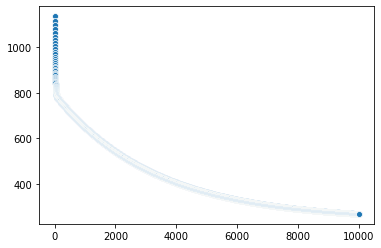

In [10]:
numEpochs= 10000
alpha = 0.0006
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise